# Learning Slope

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from datetime import date
sns.set()
%matplotlib inline

In [32]:
sns.set_style("whitegrid")

In [33]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing

In [34]:
import pwlf

In [35]:
plt.rcParams['figure.figsize'] = [16, 9]

In [36]:
w = pd.read_csv(r'The revised 292 F - 2018-12-31.csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [37]:
w = (w - 32)/1.8
w = w.round(2)

In [38]:
e = pd.read_csv(r'afterQ295(Dec2).csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [39]:
building_list = pd.read_excel('Revised startup and shutdown time all categories.xlsx', sheet_name='Office')
building_4A = building_list[building_list['Climate Zone'] == '4A']
buildings = building_4A['Building ID']

In [40]:
buildings = np.unique(buildings)

In [41]:
len(buildings)

37

In [42]:
buildings = buildings[buildings != 'MD0325ZZ']

In [43]:
building_info = pd.read_excel('extracted data of 295 buildings.xlsx',  index_col=0)

In [44]:
building_info['code']

0      AK0001ZZ
1      AK0013ZZ
2      AK0031AA
3      AL0003AC
4      AL0011ZZ
         ...   
290    IL0303ZZ
291    IL0311ZZ
292    IL2125ZZ
293    IN0031ZZ
294    KY0013ZZ
Name: code, Length: 295, dtype: object

## MD0205ZZ & MO0106ZZ, MO0134zz are deleted due to the electricity heating

In [45]:
segment = {'DC0010ZZ': 2,
           'DC0011ZZ': 2,
           'DC0021ZZ': 2,
           'DC0078ZZ': 2,
           'DC0313ZZ': 2,
           'DC0459AF': 2,
           'DC0463ZZ': 2,
           'DC0501BC': 2,
           'DC0505ZZ': 2,
           'MD0000HC': 2,
           'MD0334ZZ': 2,
           'MD0778AG': 2,
           'MO0000AF': 2,
           'MO0127ZZ': 2,
           'NC0002AE': 2,
           'PA0000AT': 2,
           'PA0144ZZ': 2,
           'VA0088ZZ': 2,
           'WV0054FP': 2,
           'WV0226ZZ': 2}

## Holiday and Problem days

'''Winter Jan, Feb
(2018, 1, 1), "New Year's Day") (Monday)
(2018, 1, 15), 'Martin Luther King Jr. Day') (Monday)
(2018, 2, 19), "Washington's Birthday") (Monday)
Spring Mar, Apr, May
(2018, 5, 28), 'Memorial Day') (Monday)
Summer Jun, Jul, Aug
(2018, 7, 4), 'Independence Day') (Wednesday)
Autumn Sep Oct Nov
(2018, 11, 12), 'Veterans Day (Observed)') (Monday)
(2018, 11, 22), 'Thanksgiving') (Thursday)'''

In [46]:
holidays = [
    date(2018, 1, 1),
    date(2018, 1, 15),
    date(2018, 2, 19),
    date(2018, 5, 28),
    date(2018, 7, 4),
    date(2018, 11, 12),
    date(2018, 11, 22),
    date(2018, 9, 3),
    date(2018, 10, 8),
    date(2018, 12, 5)
]

In [49]:
df_occ = pd.read_csv('4A 19 occupied lean detail.csv')
df_un = pd.read_csv('4A 19 unoccupied lean detail.csv')

In [50]:
df_occ['slope2'].max(), df_occ['slope2'].min(), df_occ['slope2'].median()

(2.4095120726988725e-05, 3.609570696128278e-06, 1.0586955863224913e-05)

In [51]:
df_un['slope2'].max(), df_un['slope2'].min(), df_un['slope2'].median()

(2.460679134310828e-05, -6.455847020521133e-06, 5.464311802012562e-06)

In [20]:
df = pd.DataFrame()
df['Occupied'] = df_occ['slope2']
df['Unoccupied'] = df_un['slope2']

Text(0.5, 1.0, 'The Slopes in Cooling Period for Buildings in 4A (n=19)')

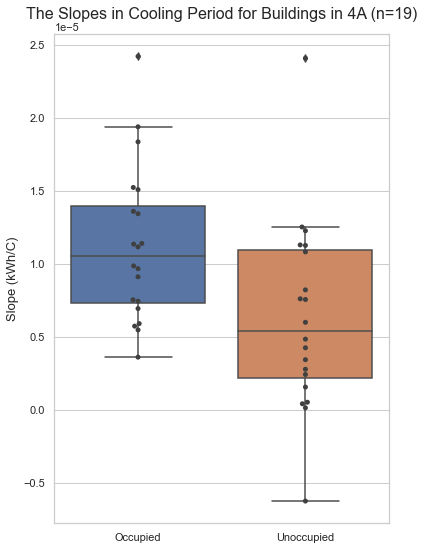

In [21]:
fig, ax = plt.subplots(figsize=(6,9))
ax = sns.boxplot(data=df, orient='v')
ax = sns.swarmplot(data=df, color=".25", orient='v')
plt.ylabel('Slope (kWh/C)', size=13)
plt.title('The Slopes in Cooling Period for Buildings in 4A (n=19)', size=16, pad=15)

In [22]:
df_occ['slope2'].median()

1.0517562384787747e-05

In [23]:
df_occ[df_occ['slope2'] > df_occ['slope2'].median()]

,building,balancePoint,slope1,slope2,intercept1,intercept2
0,DC0010ZZ,14.241131,8.398300e-08,0.000014,0.000427,0.000234
1,DC0011ZZ,2.000304,-4.213855e-06,0.000011,0.001064,0.001032
3,DC0078ZZ,4.721682,1.669526e-06,0.000018,0.000654,0.000575
4,DC0313ZZ,14.407881,-4.095390e-06,0.000019,0.000435,0.000097
7,DC0501BC,14.518899,1.395744e-06,0.000015,0.000411,0.000210
8,DC0505ZZ,14.487598,-2.986930e-06,0.000015,0.000818,0.000557
10,MD0334ZZ,13.192380,2.296562e-06,0.000024,0.001067,0.000778
15,PA0000AT,11.506288,-8.323558e-07,0.000013,0.000907,0.000743
16,PA0144ZZ,10.406368,3.176777e-07,0.000011,0.000357,0.000244
18,WV0054FP,8.016216,2.670760e-06,0.000011,0.000383,0.000313


Text(0.5, 1.0, 'MD0334ZZ')

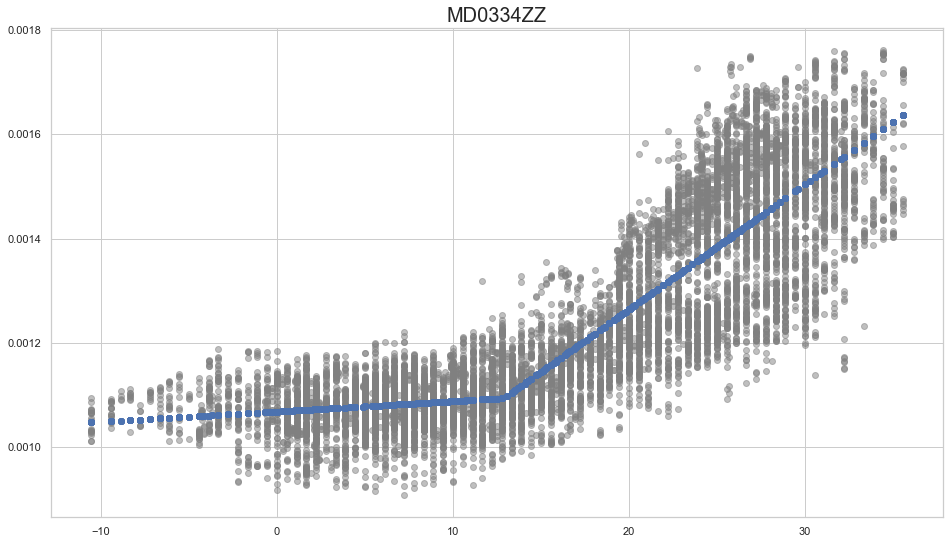

In [52]:
data = pd.DataFrame()
data['w'] = w['MD0334ZZ']
data['e'] = e['MD0334ZZ']
data = data.dropna()
data = data[~np.isin(data.index.date, holidays)]
data = data[data.index.weekday < 5].between_time('6:00', '18:00')

clustering = DBSCAN(eps=5, min_samples=8).fit(data)
res = np.unique(clustering.labels_, return_counts=True)
maj = res[0][np.argmax(res[1])]

data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == 'MD0334ZZ'].values[0])

x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
f = pwlf.PiecewiseLinFit(x, y)
res = f.fit(segment['MD0334ZZ'])
plt.subplots()
plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='gray', alpha=0.5)
plt.scatter(x, f.predict(x))
plt.title('MD0334ZZ', fontsize=20)

In [53]:
balance = f.fit_breaks[1]
a1, a2 = f.slopes
b1, b2 = f.intercepts

In [54]:
def fun1(x, balance):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2 * x + b2

In [55]:
def fun2(x, balance , a2_):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2_ * x + b1 + balance * (a1 - a2_)

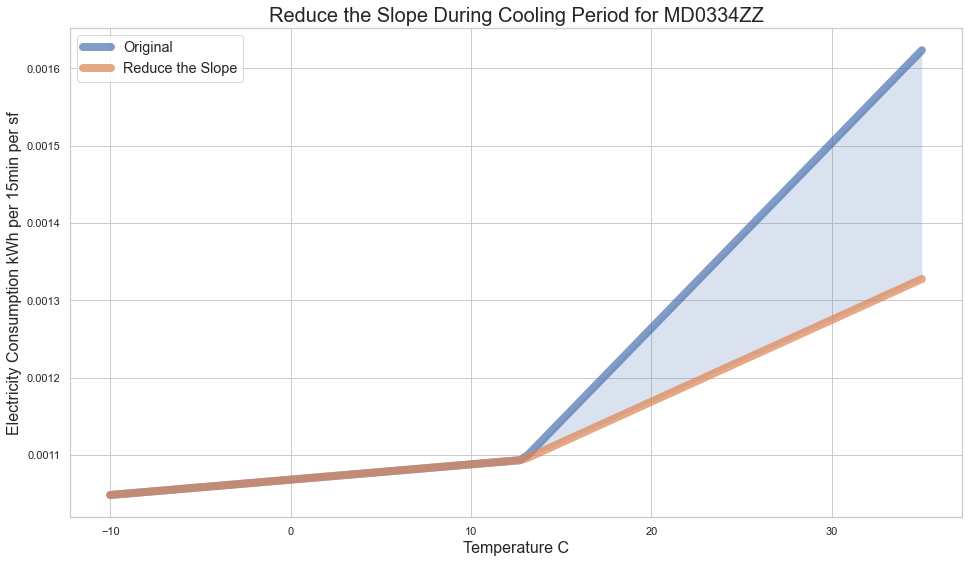

In [58]:
x = np.linspace(-10, 35, 100)
plt.plot(x, [fun1(xi, balance) for xi in x], alpha=0.7, lw=8, label='Original')
plt.plot(x, [fun2(xi, balance, df_occ['slope2'].median()) for xi in x], alpha=0.7, lw=8, label='Reduce the Slope')
plt.fill_between(x, [fun1(xi, balance) for xi in x], [fun2(xi, balance, df_occ['slope2'].median()) for xi in x], alpha=0.2)
plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
plt.xlabel('Temperature C', fontsize=16)
plt.title('Reduce the Slope During Cooling Period for MD0334ZZ', fontsize=20)
plt.legend(fontsize='x-large')

In [59]:
def fun1(x, balance, a1, b1, a2, b2):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2 * x + b2

In [60]:
def fun2(x, balance , a1, b1, a2_):
    if x <= balance:
        return a1 * x + b1
    else:
        return a2_ * x + b1 + balance * (a1 - a2_)

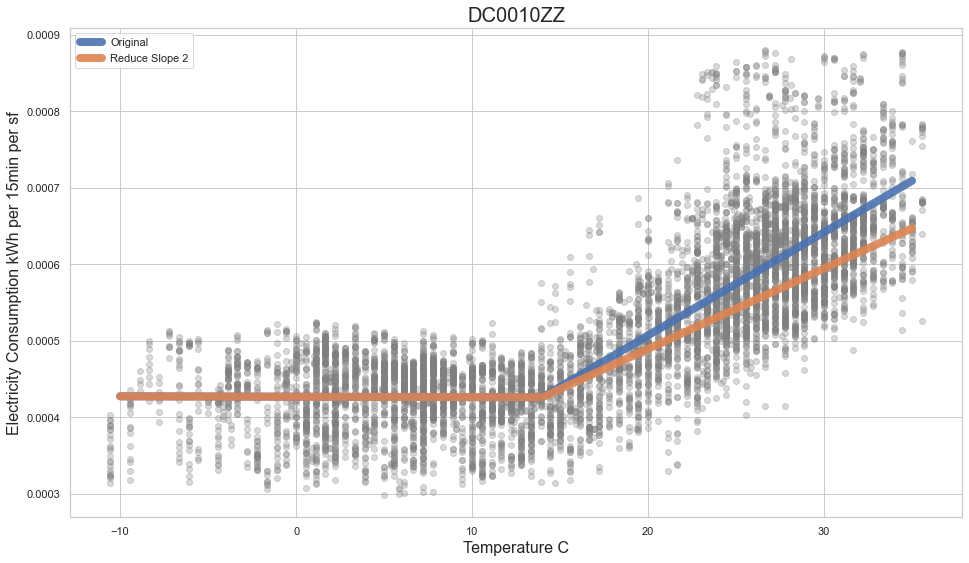

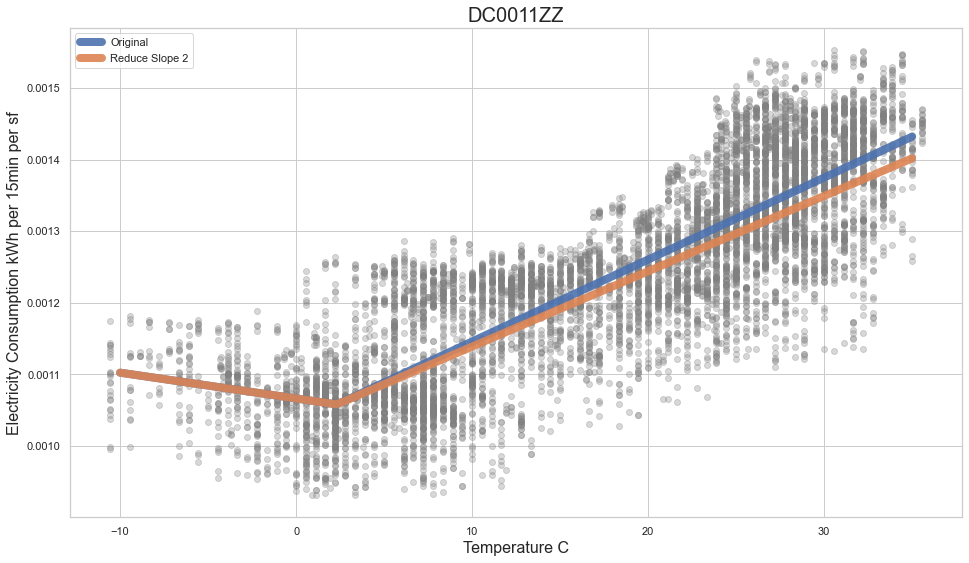

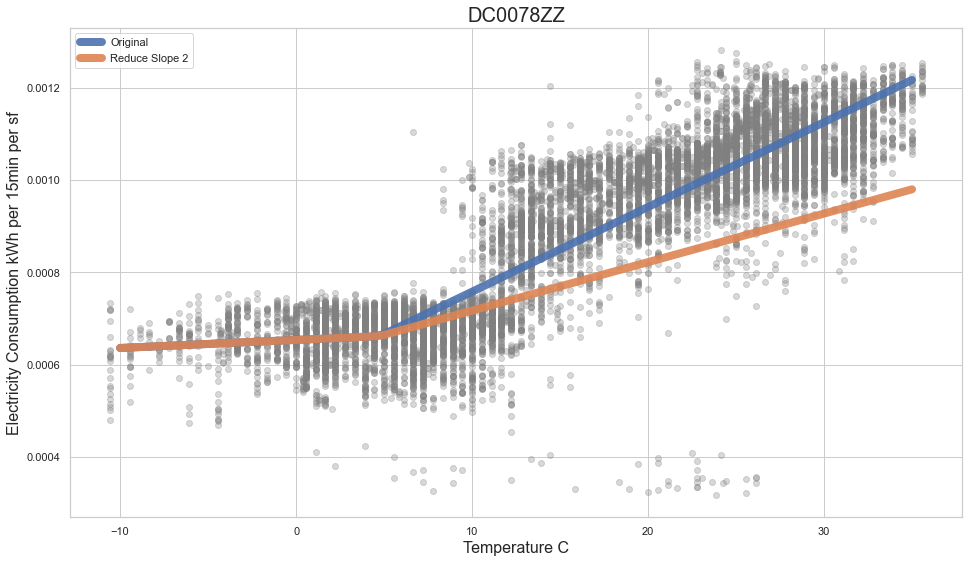

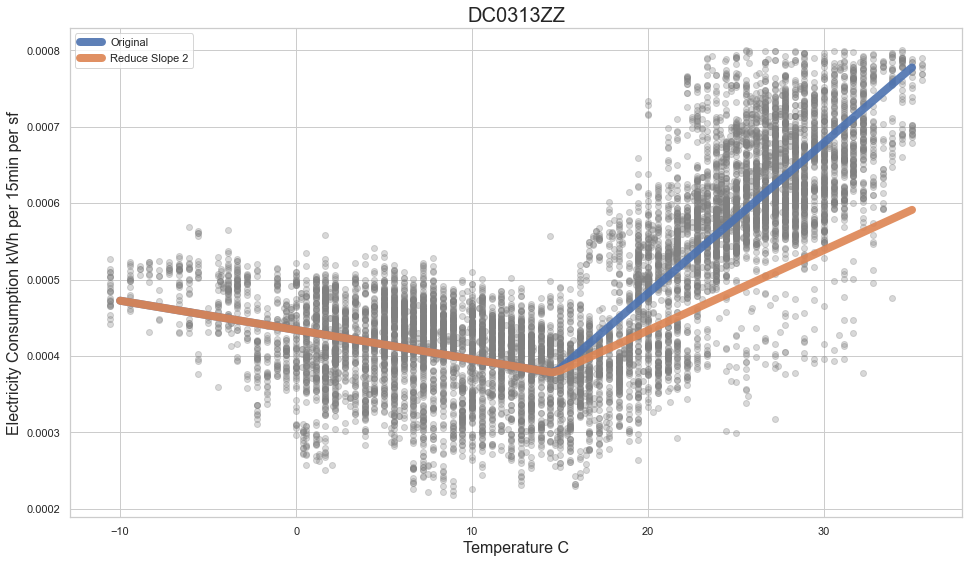

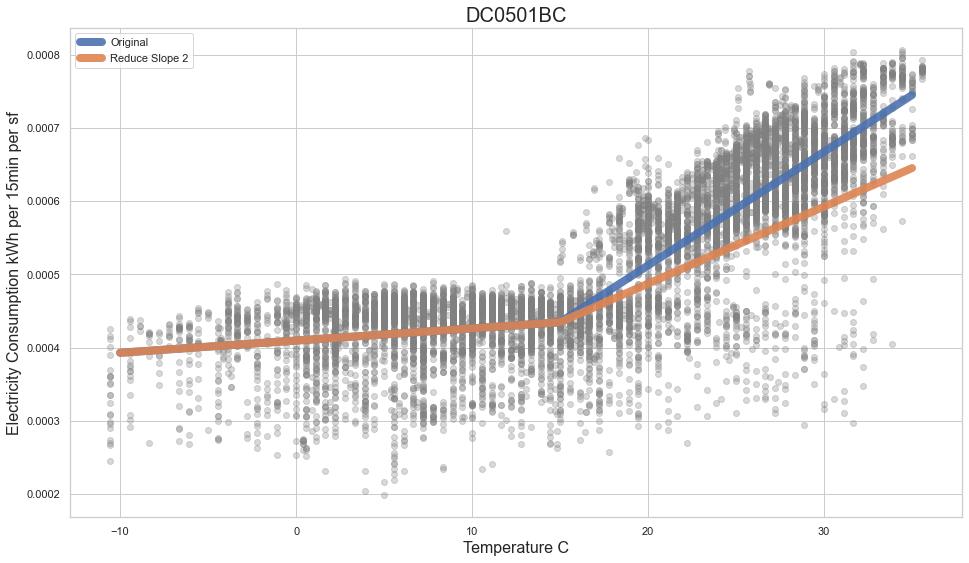

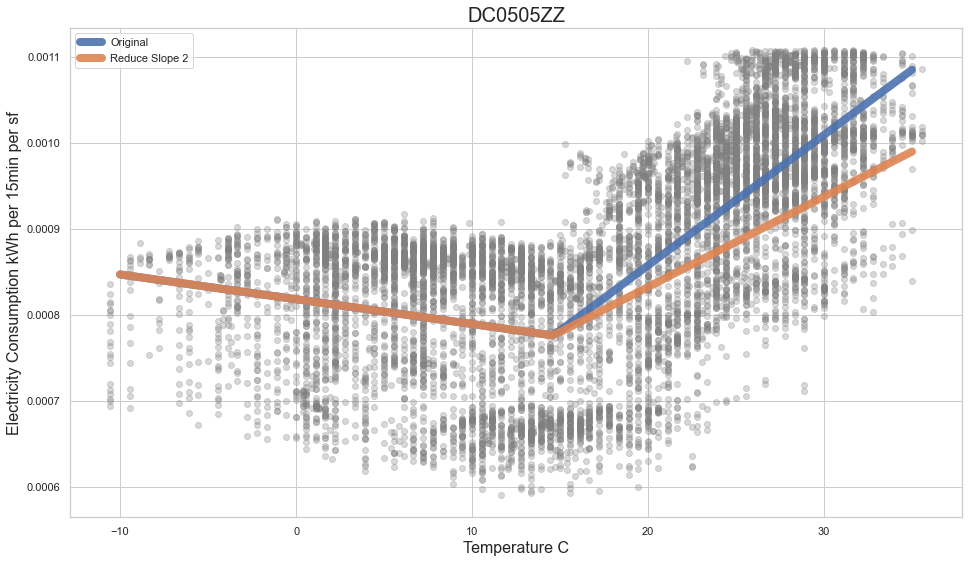

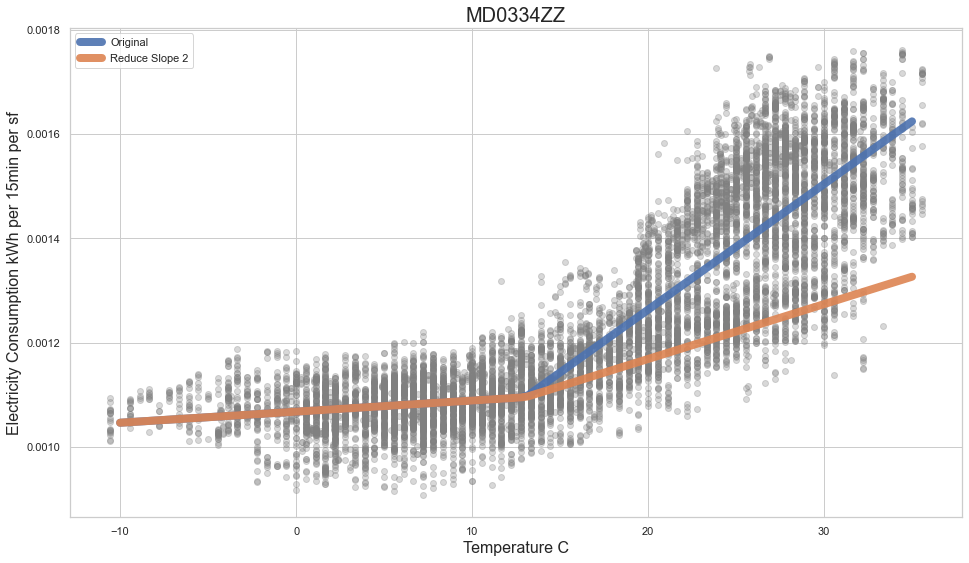

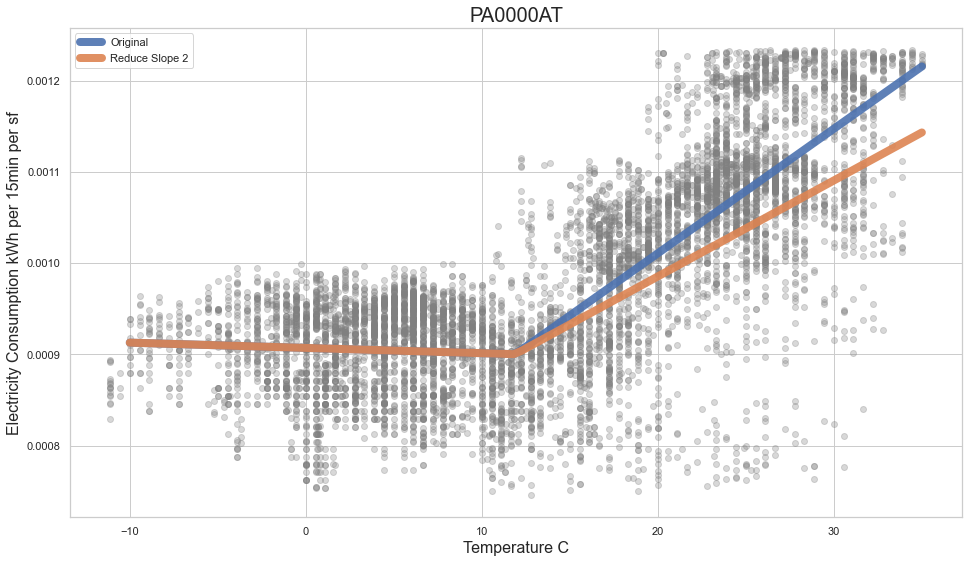

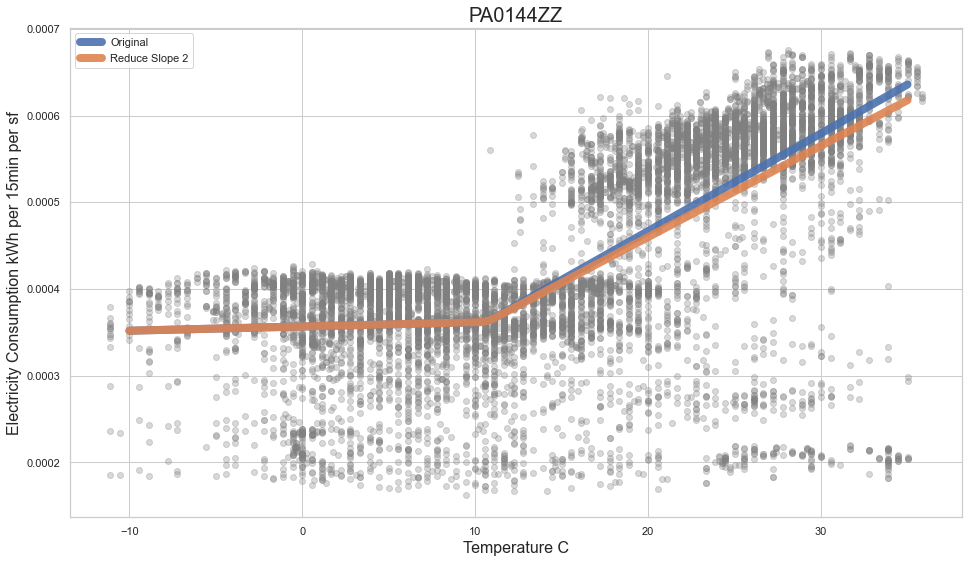

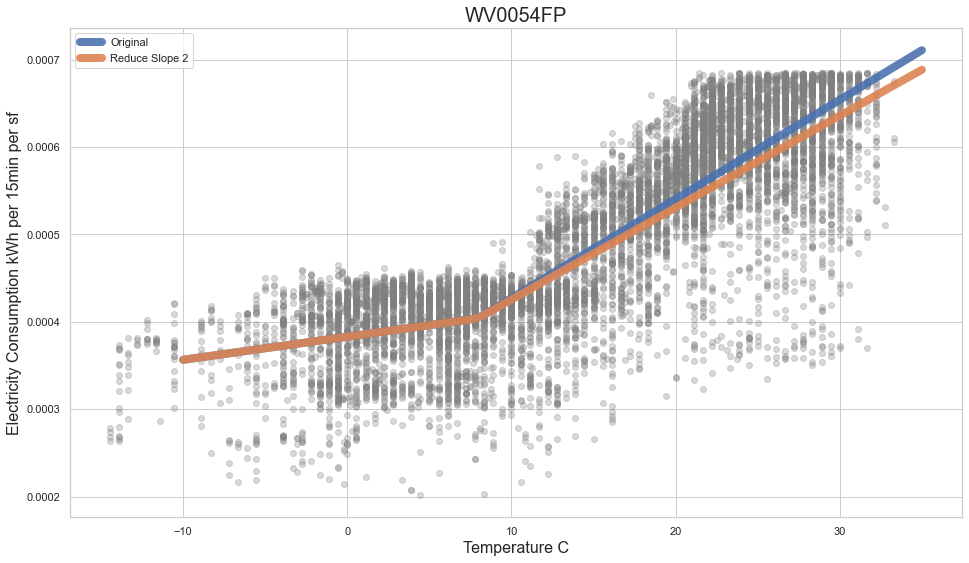

In [67]:
for i in df_occ[df_occ['slope2'] > df_occ['slope2'].median()].building:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    plt.subplots()
    plt.scatter((data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj], c='grey', alpha=0.3)
#     plt.scatter((data)['w'][clustering.labels_== maj], f.predict((data)['w'][clustering.labels_== maj]), c='blue', alpha=0.3)
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
#     plt.scatter((data)['w'][clustering.labels_== maj], [fun2(i, balancePoint, df_occ['balancePoint'].median(), a1, b1, a2, b2) for i in (data)['w'][clustering.labels_== maj]], c='red', alpha=0.3)
    plt.title(f'{i}', fontsize=20)
    x = np.linspace(-10, 35, 100)
    plt.plot(x, [fun1(i, balancePoint, a1, b1, a2, b2) for i in x], label='Original',alpha=0.9, lw=8)
    plt.plot(x, [fun2(i, balancePoint, a1, b1, df_occ['slope2'].median()) for i in x], label='Reduce Slope 2',alpha=0.9, lw=8)
    plt.ylabel('Electricity Consumption kWh per 15min per sf', fontsize=16)
    plt.xlabel('Temperature C', fontsize=16)
    plt.legend()



In [87]:
result = pd.DataFrame()
result['building'] = df_occ[df_occ['slope2'] > df_occ['slope2'].median()].building
original_e, after_e = [], []

In [88]:
for i in result['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, a1, b1, df_occ['slope2'].median()) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [89]:
result['Original'] =  original_e
result['Good Cooling Slope'] = after_e

In [90]:
result['Potential Energy Saving'] = round(100 * (result['Original'] - result['Good Cooling Slope'])/result['Original'], 2)

In [75]:
len(result)

10

In [72]:
result['Potential Energy Saving'].mean()

4.568999999999999

In [91]:
result['Original'] =  result['Original']/1000
result['Good Cooling Slope'] = result['Good Cooling Slope']/1000

In [74]:
result.to_csv('Energy Saving after reduce the slope2 for Occupied 4A 19.csv', index=False)

Text(0.5, 0, '')

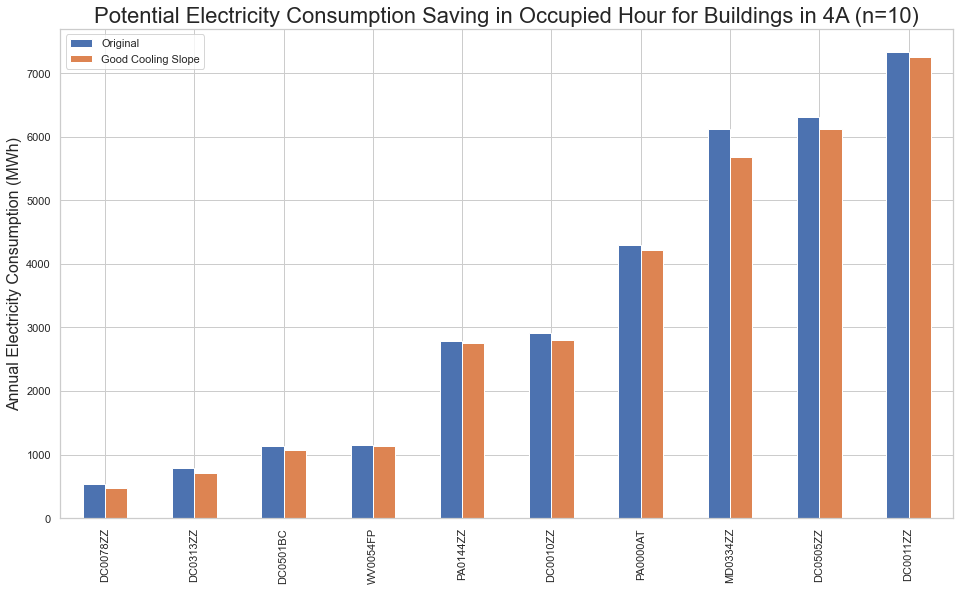

In [92]:
result.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Occupied Hour for Buildings in 4A (n=10)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

In [123]:
result = pd.DataFrame()
result['building'] = df_occ[df_occ['slope2'] > df_occ['slope2'].quantile(0.25)].building
original_e, after_e = [], []

In [124]:
len(result)

15

In [125]:
for i in result['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    data = data[~np.isin(data.index.date, holidays)]
    data = data[data.index.weekday < 5].between_time('6:00', '18:00')
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, a1, b1, df_occ['slope2'].quantile(0.25)) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [126]:
result['Original'] =  original_e
result['Better Cooling Slope'] = after_e
result['Better Energy Saving'] = round(100 * (result['Original'] - result['Better Cooling Slope'])/result['Original'], 2)

In [128]:
result['Better Energy Saving'].mean()

5.965999999999998

In [129]:
result['Original'] =  result['Original']/1000
result['Better Cooling Slope'] = result['Better Cooling Slope']/1000

Text(0.5, 0, '')

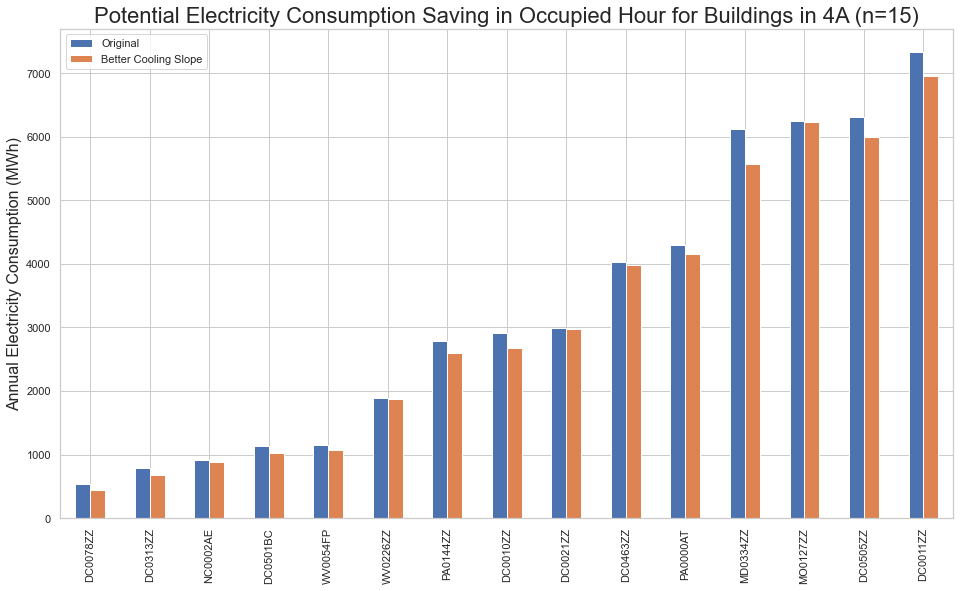

In [130]:
result.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Occupied Hour for Buildings in 4A (n=15)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

# Unoccupied Time

In [93]:
result_un = pd.DataFrame()
result_un['building'] = df_un[df_un['slope2'] > df_un['slope2'].median()].building
original_e, after_e = [], []

In [94]:
for i in result_un['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w'][clustering.labels_== maj]])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, a1, b1, df_un['slope2'].median()) for i in (data)['w'][clustering.labels_== maj]])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [95]:
result_un['Original'] =  original_e
result_un['Good Cooling Slope'] = after_e
result_un['Potential Energy Saving'] = round(100 * (result_un['Original'] - result_un['Good Cooling Slope'])/result_un['Original'], 2)

In [83]:
len(result_un)

10

In [86]:
result_un['Potential Energy Saving'].mean()

3.8389999999999995

In [96]:
result_un['Original'] =  result_un['Original']/1000
result_un['Good Cooling Slope'] = result_un['Good Cooling Slope']/1000

In [88]:
result_un.to_csv('Energy Saving after reduce the slope2 for Unoccupied 4A 19.csv', index=False)

Text(0.5, 0, '')

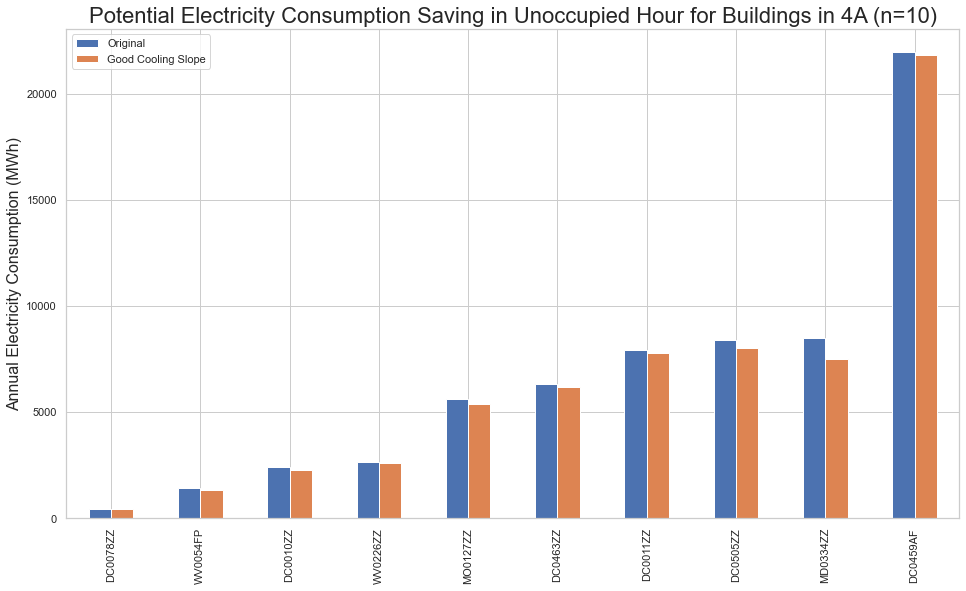

In [98]:
result_un.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Unoccupied Hour for Buildings in 4A (n=10)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')

In [115]:
result_un = pd.DataFrame()
result_un['building'] = df_un[df_un['slope2'] > df_un['slope2'].quantile(0.25)].building
original_e, after_e = [], []

In [116]:
len(result_un)

15

In [117]:
for i in result_un['building']:
    data = pd.DataFrame()
    data['w'] = w[i]
    data['e'] = e[i]
    data = data.dropna()
    
    a = data[data.index.weekday >=5]
    b = data[data.index.weekday < 5].between_time('18:00', '6:00')
    data = pd.concat([a, b])
    
    clustering = DBSCAN(eps=5, min_samples=8).fit(data)
    res = np.unique(clustering.labels_, return_counts=True)
    maj = res[0][np.argmax(res[1])]
    
    data['e'] = data['e'] / (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    
    x, y = (data)['w'][clustering.labels_== maj], (data)['e'][clustering.labels_== maj]
    f = pwlf.PiecewiseLinFit(x, y)
    res = f.fit(segment[i])
    
    _, balancePoint, _ = f.fit_breaks
    a1, a2 = f.slopes
    b1, b2 = f.intercepts
    original = sum([fun1(i, balancePoint, a1, b1, a2, b2) for i in (data)['w']])
    original = original * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    after = sum([fun2(i, balancePoint, a1, b1, df_un['slope2'].quantile(0.25)) for i in (data)['w']])
    after = after * (building_info['floor area (sf)'][building_info['code'] == i].values[0])
    original_e.append(original)
    after_e.append(after)

In [118]:
result_un['Original'] =  original_e
result_un['Better Cooling Slope'] = after_e
result_un['Potential Energy Saving'] = round(100 * (result_un['Original'] - result_un['Better Cooling Slope'])/result_un['Original'], 2)

In [119]:
result_un['Potential Energy Saving'].mean()

5.883333333333334

In [120]:
result_un['Potential Energy Saving']

,building,Original,Better Cooling Slope,Potential Energy Saving
0,DC0010ZZ,2.407836e+06,2.167013e+06,10.00
1,DC0011ZZ,8.081632e+06,7.870366e+06,2.61
2,DC0021ZZ,3.883287e+06,3.633932e+06,6.42
3,DC0078ZZ,4.388854e+05,4.304959e+05,1.91
5,DC0459AF,2.582642e+07,2.473799e+07,4.21
6,DC0463ZZ,6.311005e+06,6.110850e+06,3.17
8,DC0505ZZ,8.667365e+06,8.060523e+06,7.00
10,MD0334ZZ,8.756703e+06,7.549067e+06,13.79
11,MD0778AG,1.213686e+07,1.171260e+07,3.50
12,MO0000AF,1.351609e+07,1.348837e+07,0.21


In [121]:
result_un['Original'] =  result_un['Original']/1000
result_un['Better Cooling Slope'] = result_un['Better Cooling Slope']/1000

Text(0.5, 0, '')

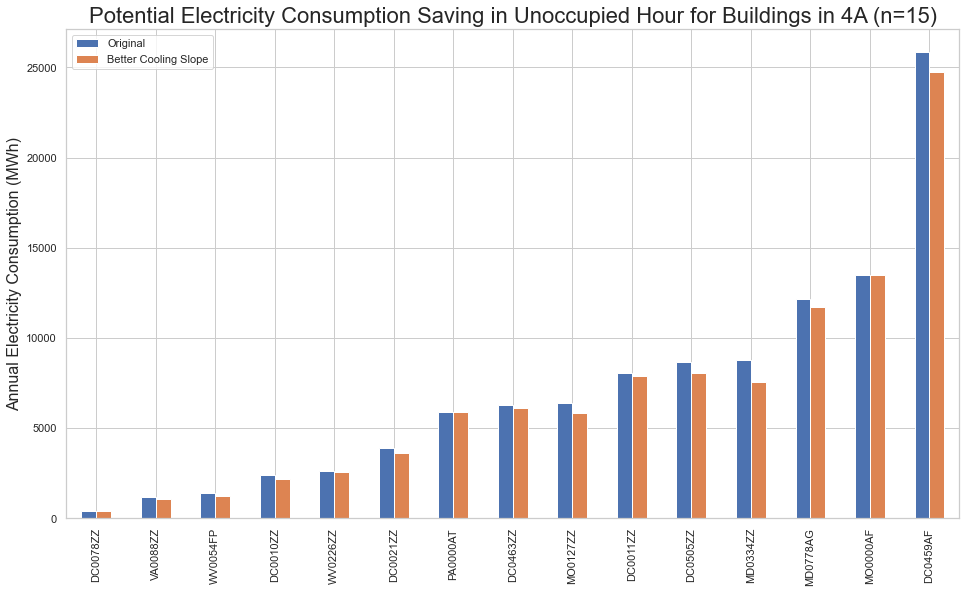

In [122]:
result_un.sort_values(by=['Original']).iloc[:, :-1].set_index('building').plot(kind="bar")
plt.title('Potential Electricity Consumption Saving in Unoccupied Hour for Buildings in 4A (n=15)', fontsize=22)
plt.ylabel('Annual Electricity Consumption (MWh)', fontsize=16)
plt.xlabel('')